In [ ]:
import numpy as np 
import pandas as pd 
import pickle

def load_pickle(fn):
    with open(fn, 'rb') as h:
        v = pickle.load(h)
    return v

# read in embeddings file
# put into format so each row is a vector
directory = '../2023-08-13_clust/embeddings_expt/log_CTD2_GDSC'
s_fn = directory + '/s_embed.pkl'
s_prime_fn = directory + '/s_prime_embed.pkl'

# pass into a pca function ready to handle each row as a vector

# create umap from embeddings and plot

In [ ]:
s = load_pickle(s_fn)
s

In [ ]:
s.shape

In [ ]:
s_prime = load_pickle(s_prime_fn)
s_prime.shape

In [ ]:
# each column is a sample
# (there are 318 samples, and it's dimension 50)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA

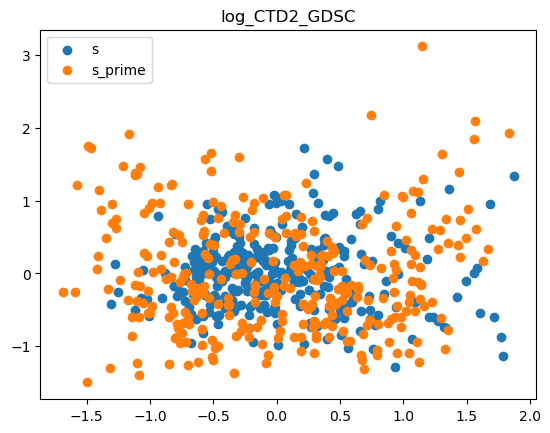

In [6]:
# function to mean-center the data
# (potentially divide by sample deviation?)
# then run pca

def load_pickle(fn):
    with open(fn, 'rb') as h:
        v = pickle.load(h)
    return v

# arr is an array where each row corresponds to one sample
def pca_preprocessing(arr):
    mean = np.mean(arr, axis=0)
    arr_centered = arr - np.tile(mean, (len(arr), 1))
    return arr_centered

# X needs to already be mean-centered
def run_pca(X):
    pca = PCA(n_components=2)
    pca.fit(X)
    # get component vectors
    components = np.array(pca.components_)
    # project data onto components
    v = np.matmul(components, np.transpose(X))
    return v[0], v[1]

# read in embeddings file
# put into format so each row is a vector
#directory = '../2023-08-13_clust/embeddings_expt'
directory = '/Users/michelameister/Documents/research/drug-response-repo/drug-response/pyro_model/results/2023-08-13_clust/embeddings_expt'

dataset_names = ['log_REP_GDSC', 'log_GDSC_CTD2', 'log_GDSC_REP', 'log_CTD2_REP', 'log_CTD2_GDSC']

for dataset in dataset_names:
    plt.clf()
    s_fn = directory + '/' + dataset + '/s_embed.pkl'
    s = load_pickle(s_fn)
    s_prime_fn = directory + '/' + dataset + '/s_prime_embed.pkl'
    s_prime = load_pickle(s_prime_fn)
    # pca on s
    s_mat = pca_preprocessing(np.transpose(s))
    s1, s2 = run_pca(s_mat)
    # pca on s_prime
    s_prime_mat = pca_preprocessing(np.transpose(s_prime))
    s_prime1, s_prime2 = run_pca(s_prime_mat)
    # plot both
    plt.scatter(s1, s2, label='s')
    plt.scatter(s_prime1, s_prime2, label='s_prime')
    plt.legend(loc='upper left')
    plt.title(dataset)
    save_fn = 'plots/embed-' + dataset + '.png'
    plt.savefig(save_fn, bbox_inches='tight')

In [ ]:
plt.scatter(s1, s2, label='s')
plt.scatter(s_prime1, s_prime2, label='s_prime')
plt.legend(loc='upper left')

In [ ]:
# OTHER TODO's
# could look at euclidean distance between embeddings
# could look at euclidean distance between umap projections
# note: not dividing by sample deviation

In [ ]:
len(s_vec1)